# Polynomial Regression

The goal of this notebook is to study the topic of Polynomial Regression on real-world data and to solve the problem using data science methodology.My name is Sina, I'm new to the data science! and this notebook was built for my personal practice. 

---
We got three different datasets in the previous notebook [[Simple Linear Regression](https://github.com/siniorone/Machine-Learning/blob/main/Python/01-Simple%20Linear%20Regresion.ipynb)], and by merging them, we were able to generate the dataset we needed and apply a simple linear regression model to our data.
[[Go to the previous notebook for instructions on how to construct our dataset.](https://github.com/siniorone/Machine-Learning/blob/main/Python/01-Simple%20Linear%20Regresion.ipynb)]
Our dependent variable was the ``death toll``, and our dependent variable was the ```vaccination rate```.
When we apply the model to data from **Italy**, we get the **R2-score: 0.78**.
It appeared that the model was relatively adequate until we applied it to data again from **Portugal** country and found that it lacked the required accuracy;
We have saved the data prepared in the previous notebook under the name of ```covid_vaccination_vs_death_ratio‍‍‍‍‍‍.csv```, and now we are reading it through a file. 

### we will now continue the story. 
First, let's have a look at the current state of our model using data from Portugal. 

In [1]:
# Import Skcit-Learn methods we want to use in this notebook
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
# Import useful Libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [4]:
# we read the data frame we need using Pandas from csv file 
df=pd.read_csv("./dataset/covid_vaccination_vs_death_ratio.csv")

Coefficients: -1.1422133580564595
Intercept: 78.73515370381895


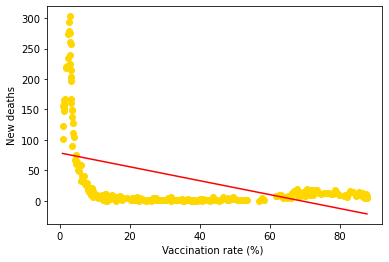

Mean absolute error: 44.99
Residual sum of squares (MSE): 3593.70
R2-score: 0.24


In [17]:
# We put the data from Portugal in the mydf variable .
mydf = df[df.country == "Portugal"]
# Create an object to build a linear regression model from Scikit-Learn Library. 
regr = linear_model.LinearRegression()
# We define training variables via Numpy in arrays .
train_x = np.asanyarray(mydf[['ratio']])
train_y = np.asanyarray(mydf[['New_deaths']])
# Using fit(x, y) method of Scikit-Learn object, we fit the model on the training variables.
regr.fit (train_x, train_y)
# The coefficients and Intercept of this Simple Linear Regression
print(f'Coefficients: {regr.coef_[0][0]}')
print(f'Intercept: {regr.intercept_[0]}')
# Now it is time to draw the line we want using Coefficients and Intercept. 
plt.scatter(mydf.ratio, mydf.New_deaths,  color='gold') 
XX = train_x
YY = regr.intercept_[0] + regr.coef_[0][0]*train_x   # y = Intercept + (Coeff * VaccinationRate)
# Plotting Regression Line
plt.plot(XX, YY, color='red')
plt.xlabel("Vaccination rate (%) ")
plt.ylabel("New deaths")
plt.show()
# Calculate Predicted values by this model
test_x = np.asanyarray(mydf[['ratio']])
test_y = np.asanyarray(mydf[['New_deaths']])
predict_y = regr.predict(train_x)
# Usimg Predicted values to mesure Error of this model
# Mean absolute error
MAE = np.mean(np.absolute(predict_y  - test_y))  
print(f"Mean absolute error: {MAE:.2f}")
# Mean squared error
MSE =  np.mean((predict_y  - test_y) ** 2)
print(f"Residual sum of squares (MSE): {MSE:.2f}")
# R2-score
r2 = r2_score(test_y , predict_y)
print(f"R2-score: {r2:.2f}")